# Espectros

En este cuaderno usaremos listas de tuplas para representar espectros.

Cada una de las tuplas tendrá la forma (frec,ampl,fase) de una componente cosenoidal.

En este cuaderno veremos cómo

* Representar el espectro

* Sintetizar la señal correspondiente en el dominio del tiempo.

In [1]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


import math

import warnings
warnings.filterwarnings('ignore')

## Representación del espectro
En primer lugar veremos cómo representar el espectro en una gráfica de rayas.


In [8]:
def plot_espectro_amplitud(espectro):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    '''
    ncompo = len(espectro)
    amplitudes = np.zeros(ncompo)
    frecuencias = np.zeros(ncompo)
    for k in range(ncompo):
        amplitudes[k] = espectro[k][1]
        frecuencias[k] = espectro[k][0]
    amplitudes=np.absolute(amplitudes)
    _=plt.stem(frecuencias,np.abs(amplitudes), markerfmt=" ")
    _=plt.title('Espectro de amplitud')
    _=plt.xlabel('frecuencia')
    _=plt.xlim([-0.1*np.max(frecuencias),1.2*np.max(frecuencias)]) 
    _=plt.grid()

### Prueba de la función

In [9]:
# Ponemos unos valores cualquiera de amplitudes frecuencias y fases
espectro =[ (0,1,0), (1,2,math.pi/3), (1.8,0.4,0), (2.7,0.3,-0.256*math.pi)]

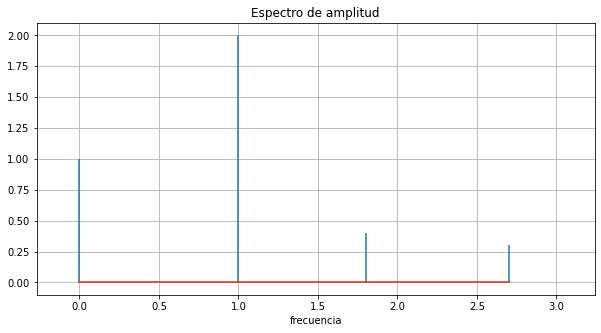

In [10]:
plot_espectro_amplitud(espectro)

## Síntesis de señal a partir del espectro

Tenemos que hacer una función que genere una matriz 

* Con tantas columnas como componentes espectrales. Cada columna será una de las sinusoides.

* Con tantas filas como instantes

Para calcular la señal suma simplemente haremos una suma por filas.



In [11]:
def sumaTonos(espectro,t):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    Devuelve un array de numpy con tantas columnas como elementos tenga el espectro
    Cada una de ellas es una componente frecuencial
    
    La señal suma se puede obtener haciendo np.sum(out,axis=1)
    '''
    
    # La señal suma se puede obtener haciendo np.sum(,axis=1)
    
      
    ncomponentes = len(espectro)
    out=np.zeros((t.size,ncomponentes))
    for k in range(ncomponentes):
        frecuencia = espectro[k][0]
        amplitud = espectro[k][1]
        fase = espectro[k][2]      
        out [:,k]= amplitud * np.cos(2*math.pi*frecuencia*t + fase)
    return out

### Prueba de la función

In [13]:
# Emplearemos el mismo espectro de la señal anterior
t=np.linspace(0,5,1000)

In [14]:
S=sumaTonos(espectro,t)

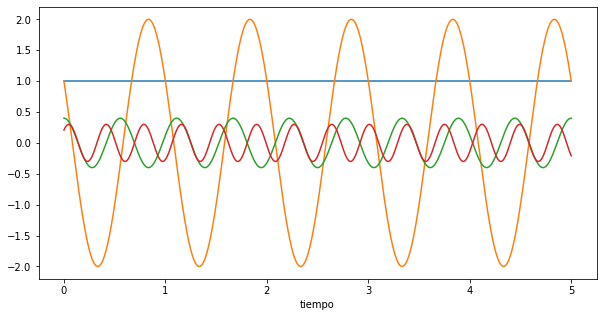

In [16]:
# Podemos representar en una misma gráfica cada una de las componentes

_=plt.plot(t,S)
_=plt.xlabel('tiempo')

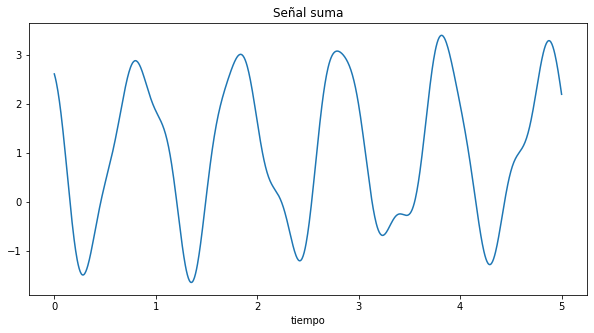

In [17]:
# La señal temporal correspondiente al espectro será la suma de todos esos cosenos.
x=np.sum(S,axis=1)

_=plt.plot(t,x)
_=plt.xlabel('tiempo')
_=plt.title('Señal suma')

Se observa que es una señal con una forma *extraña*. Sin embargo su descripción en términos de frecuencia es muy sencilla. Es la suma de 4 términos espectrales:

In [18]:
espectro

[(0, 1, 0),
 (1, 2, 1.0471975511965976),
 (1.8, 0.4, 0),
 (2.7, 0.3, -0.8042477193189871)]